In [3]:
from openpilot_tools.lib.logreader import LogReader
from openpilot_tools.lib.framereader import FrameReader
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
speed_list = []
for i in range(2, 19):
    lr = LogReader("/home/comma/Desktop/mntShare/custom_data/comma_data/rlogs/train_" + str(i) + ".bz2")
    speed_list = speed_list + list(lr)

In [5]:
([l for l in speed_list if l.which() == 'live20'][0])

<log.capnp:Event reader (logMonoTime = 169016560559, live20 = (angleOffsetDEPRECATED = 0, calStatusDEPRECATED = 0, leadOne = (dRel = 0, yRel = 0, vRel = 0, aRel = 0, vLead = 0, aLeadDEPRECATED = 0, dPath = 0, vLat = 0, vLeadK = 0, aLeadK = 0, fcw = false, status = false, aLeadTau = 0), cumLagMs = -43.458275, mdMonoTime = 168990733111, ftMonoTimeDEPRECATED = 0, calCycleDEPRECATED = 0, calPercDEPRECATED = 0, canMonoTimes = [], l100MonoTime = 169008916704, radarErrors = []))>

In [6]:
speed_data = [l.carState.vEgo for l in speed_list if l.which() == 'carState']

In [7]:
len(speed_data)

102000

In [8]:
speed_data[100000]

16.743471145629883

In [9]:
np.array(speed_data)

array([11.29826355, 11.29788208, 11.2980442 , ..., 10.32175159,
       10.32503128, 10.32786751])

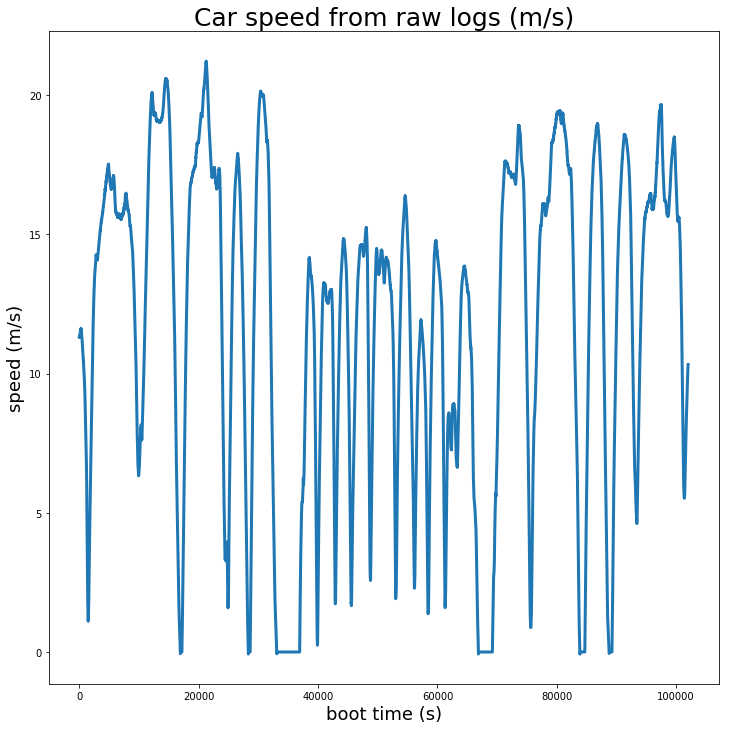

In [10]:
figsize(12,12);
plot(np.array(speed_data), linewidth=3);
title('Car speed from raw logs (m/s)', fontsize=25);
xlabel('boot time (s)', fontsize=18);
ylabel('speed (m/s)', fontsize=18);

In [11]:
speed_data = np.array(speed_data)

In [12]:
num_secs = 50
num_segs = 17
num_frames_per_segs = 20
num_bins = num_secs * num_segs * num_frames_per_segs

In [13]:
import numpy
from scipy.stats import binned_statistic
bin_means = binned_statistic(speed_data, speed_data, bins=num_bins, range=(0, 500))

In [14]:
from scipy.signal import resample

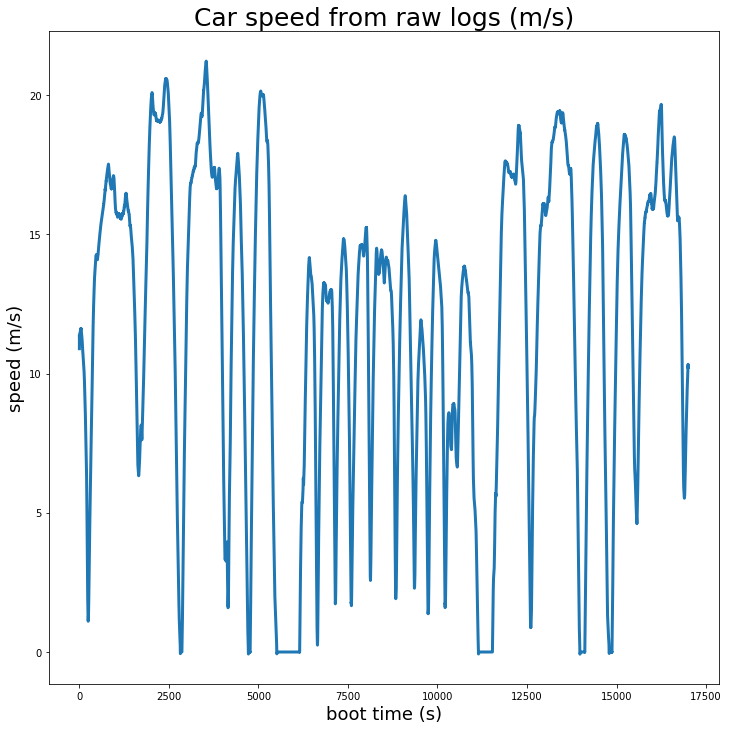

In [15]:
figsize(12,12);
plot(resample(speed_data, num_bins), linewidth=3);
title('Car speed from raw logs (m/s)', fontsize=25);
xlabel('boot time (s)', fontsize=18);
ylabel('speed (m/s)', fontsize=18);


In [16]:
resampled_speeds = resample(speed_data, num_bins)

In [17]:
import pandas as pd

In [18]:
speed_df = pd.DataFrame(resampled_speeds, columns = ["Speed"])

In [19]:
speed_df.to_csv("speed_resampled.csv")

In [20]:
import pandas as pd
import numpy as np
import cv2 as cv
import h5py
import matplotlib.pyplot as plt
from skimage.transform import resize

In [21]:
speeds = resampled_speeds

In [40]:
from tqdm import tqdm
hdf5_path = './train_data/train_new.hdf5'
data = h5py.File(hdf5_path, "w")
resize_size = (224,224,3)
data.create_dataset("frame", shape = (len(speeds), resize_size[0], resize_size[1], resize_size[2]),
                    maxshape = (len(speeds), resize_size[0], resize_size[1], resize_size[2]), 
                    chunks = (1, resize_size[0], resize_size[1], resize_size[2]))
data.create_dataset("op_flow", shape = (len(speeds), resize_size[0], resize_size[1], resize_size[2]),
                    maxshape = (len(speeds), resize_size[0], resize_size[1], resize_size[2]), 
                    chunks = (1, resize_size[0], resize_size[1], resize_size[2]))
data.create_dataset("speed", shape = (len(speeds), 1), maxshape = (len(speeds), 1))

<HDF5 dataset "speed": shape (17000, 1), type "<f4">

In [41]:
(17000/50)/20

17.0

In [42]:
len(speeds)

17000

100
200
300
400
500
600
700
800
900
1000
image wasnt loaded properly
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
image wasnt loaded properly
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
image wasnt loaded properly
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
image wasnt loaded properly
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
image wasnt loaded properly
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
image wasnt loaded properly
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
image wasnt loaded properly
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
image wasnt loaded properly
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
image wasnt loaded properly
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
image wasnt loaded properly
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
image wasnt loaded properly
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
image wasnt loaded properly
12100
12200
12300
12400
12500
12600
12700
12800
1290

IndexError: index 17000 is out of bounds for axis 0 with size 17000

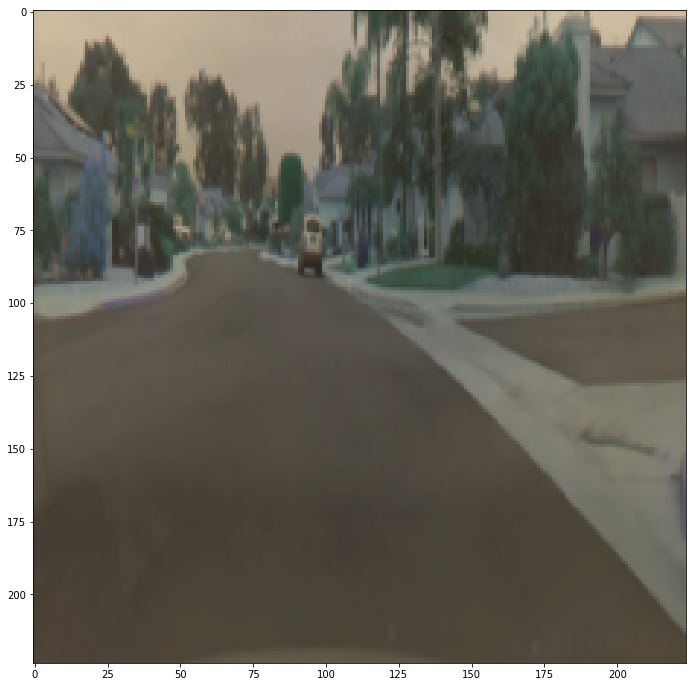

In [46]:
def data_gen():
    count = 0
    lower_bound = 2
    upper_bound = 19
    for i in range(lower_bound, upper_bound):
        vidcap = cv.VideoCapture("/home/comma/Desktop/mntShare/custom_data/comma_data/videos/train_" + str(i) + '.mp4')
        success,frame1 = vidcap.read()
        frame1 = frame1[160:360, :]
        prvs = cv.cvtColor(frame1,cv.COLOR_BGR2GRAY)
        hsv = np.zeros_like(frame1)
        hsv[...,1] = 255
        while success:
            if (count % 100 == 0) and count > 0:
                print(count)
                plt.imshow(frame2)
            success,frame2 = vidcap.read()
            if success == True:
                frame2 = frame2[160:360, :]
                
                next = cv.cvtColor(frame2,cv.COLOR_BGR2GRAY)
                flow = cv.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
                mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
                hsv[...,0] = ang*180/np.pi/2
                hsv[...,2] = cv.normalize(mag,None,0,255,cv.NORM_MINMAX)
                bgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
                
                speed = speeds[count]
                
                frame2 = resize(frame2, (resize_size))#.astype(numpy.float32)
                
                #frame2 = cv.cvtColor(frame2,cv.COLOR_BGR2RGB)
                data["frame"][count, :, :, :] = frame2

                bgr = resize(bgr, (resize_size))
                data["op_flow"][count, :, :, :] = bgr
                data["speed"][count, :] = speed
                prvs = next
                count += 1
            else:
                print("image wasnt loaded properly")
                continue

            

            
        
data_gen()


In [47]:
data.close()

In [53]:
pd.DataFrame(resampled_speeds).describe()

,0
count,17000.000000
mean,11.743200
std,6.040292
min,-0.077090
25%,7.400343
50%,13.395165
75%,16.701885
max,21.219337


0.99607843
[10.1021595]


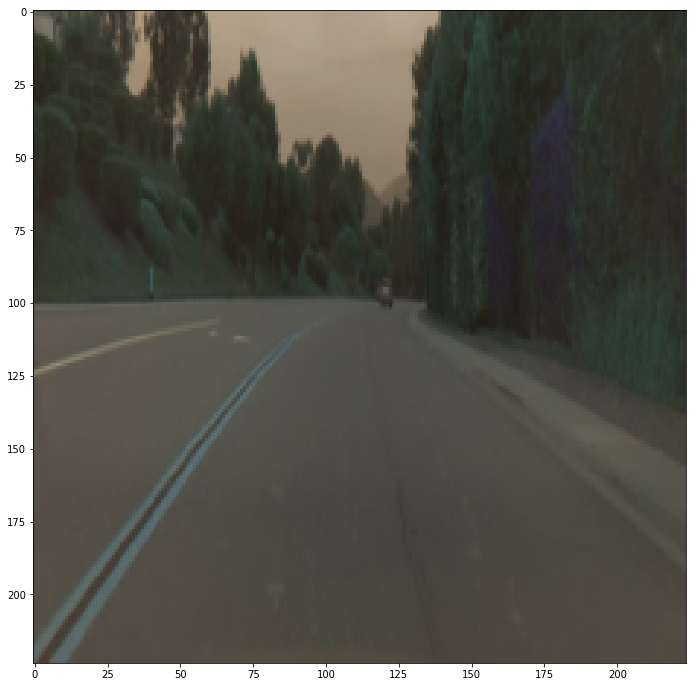

In [49]:
with h5py.File(hdf5_path, "r") as f:
    print(f["frame"][130].max())
    plt.imshow(f["frame"][500][:, :])
    print(f['speed'][130])